# Distance measures in cosmology #

There are a few different definitions of "distance" in cosmology which all coincide for sufficiently small redshifts. The expressions for these distances are most practical when written as functions of redshift $z$, since redshift is always the observable.

To compute the distance to an object from its redshift, we must integrate the Friedmann equation,

$$
H(z) \equiv H_0 E(z) = H_0 \sqrt{ \Omega_{\rm r} (1+z)^4 + \Omega_{\rm m} (1+z)^3 + \Omega_k (1+z)^2 + \Omega_\Lambda } \, .
$$

Here, $\Omega_{\rm r}$ is the total radiation energy density, $\Omega_{\rm m}$ is the total matter density, $\Omega_{\Lambda}$ is the dark energy density, $\Omega_k = 1 - \Omega_{\rm m} - \Omega_\Lambda$ represents the curvature, $H_0$ is the Hubble parameter today, and $H(z)$ is the Hubble parameter at a given redshift.

Although for some limited choices of parameters (e.g. matter-only: $\Omega_{\rm m}=\Omega_{\rm total} = 1$) the comoving distance integral defined below has a closed analytic form, in general—and specifically for the parameters of our Universe—we can only find a solution numerically.

### Hubble distance ###
The "naive" distance at which the recession speed is the speed of light:

$$
d_H = \frac{c}{H_0}
$$

### Comoving distance ###
Comoving distance (or the line-of-sight comoving distance) is the distance between two points measured along a path defined at the present cosmological time:

$$
d_C (z) = d_H \int_0^z \frac{{\rm d} z^\prime}{E(z^\prime)}
$$

For objects moving with the Hubble flow, it remains constant in time, as comoving distance accounts for the expansion of the universe. The comoving distance is the proper distance at the present time, and is in some sense the fundamental distance measure in cosmography since, as will be seen below, all others are quite simply derived in terms of it. 


### Angular diameter distance ###
The angular diameter distance is defined as the ratio of an object’s physical transverse size to its angular size (in radians):

$$
d_A (z) = \frac{d_M (z)}{1+z}
$$

It is famous for not increasing indefinitely as $z \to \infty$; it turns over at $z \sim 1$ and thereafter more distant objects actually appear larger in angular size.

### Luminosity distance ###
The luminosity distance is defined by the relationship between bolometric (ie, integrated over all frequencies) flux $S$ and bolometric luminosity $L$:

$$
d_L \equiv \sqrt{ \frac{L}{4 \pi S} }
$$

It turns out that this is related to the transverse comoving distance and angular diameter distance by

$$
d_L (z) = (1 + z) d_M (z) = (1 + z)^2 d_A (z)
$$

[Ref.: Hogg, Distance measures in cosmology](https://arxiv.org/abs/astro-ph/9905116)

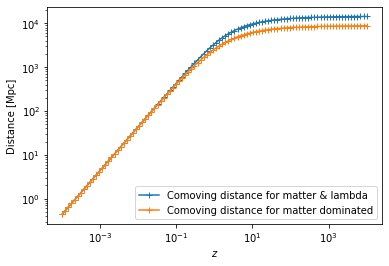

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.cosmology import FlatLambdaCDM
import numpy as np

# The Planck 2015 cosmology.
cosmo = FlatLambdaCDM(H0=67.7, Om0=0.307)

# Einstein-de Sitter cosmology
cosmo1 = FlatLambdaCDM(H0=67.7, Om0=1)

z = np.logspace(-4, 4, 100)
dC = cosmo.comoving_distance(z)
dC1 = cosmo1.comoving_distance(z)

plt.plot(z, dC, marker='+', label='Comoving distance for matter & lambda')
plt.plot(z, dC1, marker='+', label='Comoving distance for matter dominated')
plt.xlabel(r'$z$')
plt.ylabel('Distance [Mpc]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In both models the plateau happens around the same time, which indicates that this is not a feature of a specific universe but rather a fundamental thing/limitation of the formulas. We can also interpret this as the fact that the universe is finite and thus the distance function must plateau at some point.

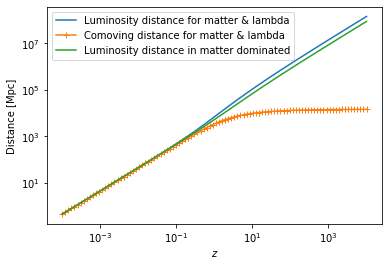

In [8]:
dL = cosmo.luminosity_distance(z)
dL1 = cosmo1.luminosity_distance(z)

plt.plot(z, dL, label='Luminosity distance for matter & lambda')
plt.plot(z, dC, marker='+', label='Comoving distance for matter & lambda')
plt.plot(z, dL1, label='Luminosity distance in matter dominated')
plt.xlabel(r'$z$')
plt.ylabel('Distance [Mpc]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In practice we don't measure the comoving distance. We rather measure luminosity (or even angular distance) and use this to extrapolate the comoving distance.

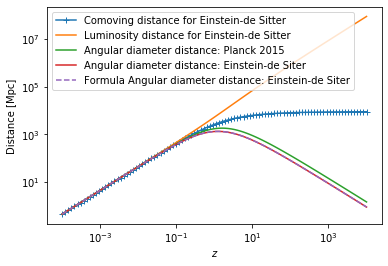

In [11]:
dA = cosmo.angular_diameter_distance(z)
dA1 = cosmo1.angular_diameter_distance(z)
c = 299792.458
dH = c / cosmo.H(0)
dA_form_z = 2 * dH * (1 + z - np.sqrt(1 + z))/(1 + z)**2

plt.plot(z, dC1, marker='+', label='Comoving distance for Einstein-de Sitter')
plt.plot(z, dL1, label='Luminosity distance for Einstein-de Sitter')
plt.plot(z, dA, label='Angular diameter distance: Planck 2015')
plt.plot(z, dA1, label='Angular diameter distance: Einstein-de Siter')
plt.plot(z, dA_form_z, linestyle='--', label='Formula Angular diameter distance: Einstein-de Siter')

plt.xlabel(r'$z$')
plt.ylabel('Distance [Mpc]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

We see that the angular distance of far away objects is less than their actual (comoving) distance, while the luminosity distance is larger. Thus, the _real_ distance is inbetween the two measurements we _can_ make.

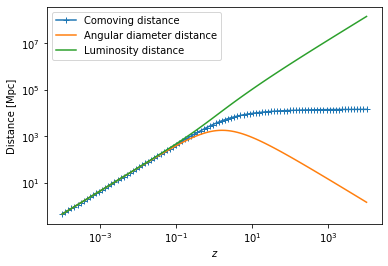

In [4]:
plt.plot(z, dC, marker='+', label='Comoving distance')
plt.plot(z, dA, label='Angular diameter distance')
plt.plot(z, dL, label='Luminosity distance')
plt.xlabel(r'$z$')
plt.ylabel('Distance [Mpc]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()